In [2]:
# PROJETO 02 - VISUALIZAÇÕES DE DADOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

print("PROJETO 02 - CONFIGURACAO INICIAL")

# Criar pasta data se não existir
if not os.path.exists('data'):
    os.makedirs('data')

# Lista de arquivos para baixar
files = [
    'olist_customers_dataset.csv',
    'olist_orders_dataset.csv',
    'olist_order_items_dataset.csv',
    'olist_products_dataset.csv'
]

# URL base do GitHub
base_url = 'https://raw.githubusercontent.com/Matheus-Diniz-Silva/portfolio-python-analise-dados/main/01-analise-exploratoria-pandas/data/'

print("Baixando dados do GitHub...")

# Baixar cada arquivo
for file in files:
    url = base_url + file
    try:
        response = requests.get(url)
        if response.status_code == 200:
            with open(f'data/{file}', 'wb') as f:
                f.write(response.content)
            print(f'{file} baixado com sucesso')
        else:
            print(f'Erro ao baixar {file} - Status: {response.status_code}')
    except Exception as e:
        print(f'Erro: {e}')

print("Download concluido")

# Configurações de estilo para visualizações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Ambiente configurado para visualizacoes")

PROJETO 02 - CONFIGURACAO INICIAL
Baixando dados do GitHub...
olist_customers_dataset.csv baixado com sucesso
olist_orders_dataset.csv baixado com sucesso
olist_order_items_dataset.csv baixado com sucesso
olist_products_dataset.csv baixado com sucesso
Download concluido
Ambiente configurado para visualizacoes


CARREGANDO DADOS
Customers: (99441, 5)
Orders: (99441, 8)
Order Items: (112650, 7)
VISUALIZACAO 1 - DISTRIBUICAO GEOGRAFICA


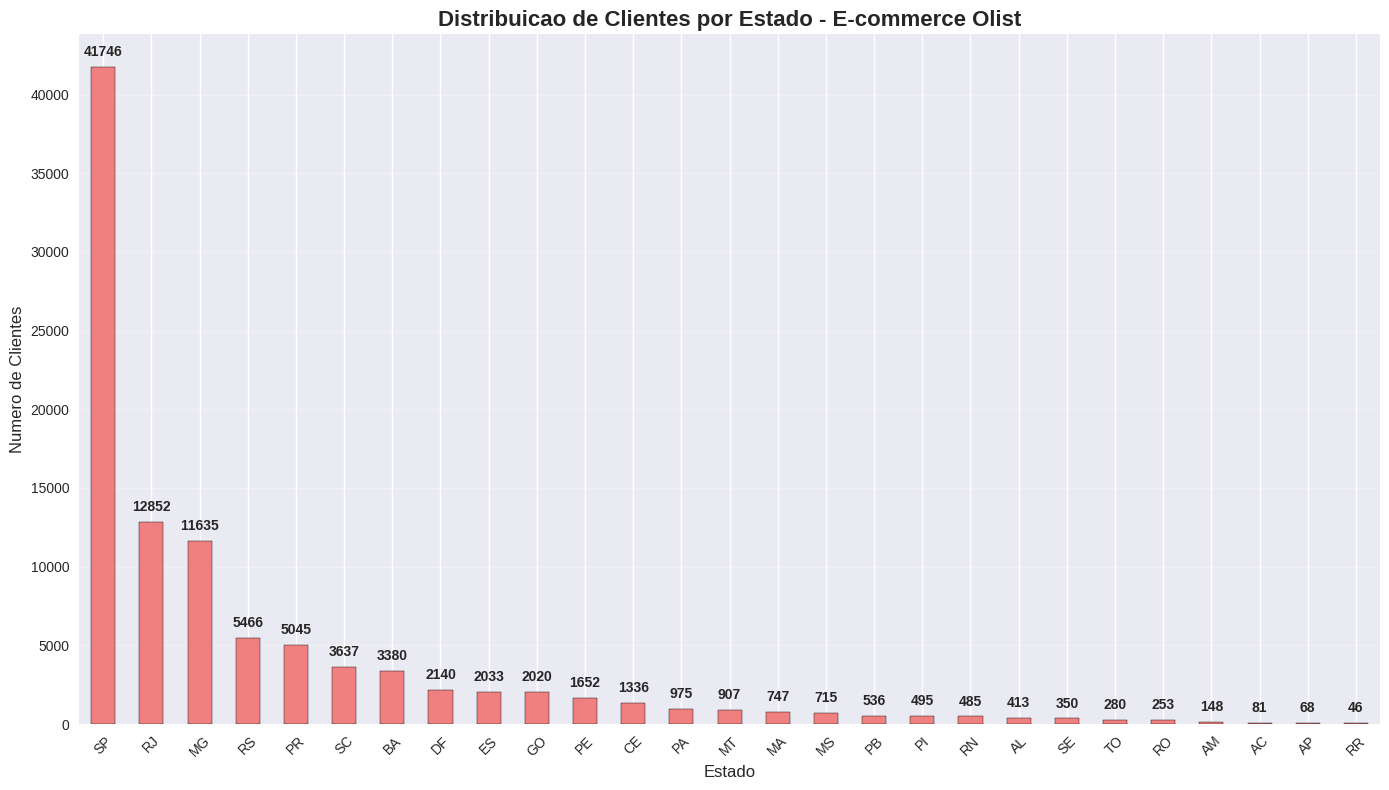

Estado com mais clientes: SP (41,746 clientes)
Participacao de SP: 42.0%
Top 5 estados concentram: 77.2% dos clientes


In [3]:
# CARREGAR DADOS E PRIMEIRA VISUALIZACAO
print("CARREGANDO DADOS")

# Carregar dados
customers = pd.read_csv('data/olist_customers_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
order_items = pd.read_csv('data/olist_order_items_dataset.csv')

print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")

# VISUALIZACAO 1: Distribuicao geografica de clientes
print("VISUALIZACAO 1 - DISTRIBUICAO GEOGRAFICA")

# Preparar dados
estado_distribuicao = customers['customer_state'].value_counts()

# Criar grafico de barras
plt.figure(figsize=(14, 8))
bars = estado_distribuicao.plot(kind='bar', color='lightcoral', edgecolor='black')

plt.title('Distribuicao de Clientes por Estado - E-commerce Olist', fontsize=16, fontweight='bold')
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Numero de Clientes', fontsize=12)
plt.xticks(rotation=45)

# Adicionar valores nas barras
for i, v in enumerate(estado_distribuicao):
    plt.text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Estatisticas da distribuicao
print(f"Estado com mais clientes: {estado_distribuicao.index[0]} ({estado_distribuicao.iloc[0]:,} clientes)")
print(f"Participacao de SP: {(estado_distribuicao.iloc[0] / len(customers) * 100):.1f}%")
print(f"Top 5 estados concentram: {(estado_distribuicao.head(5).sum() / len(customers) * 100):.1f}% dos clientes")

VISUALIZACAO 2 - EVOLUCAO TEMPORAL DE PEDIDOS


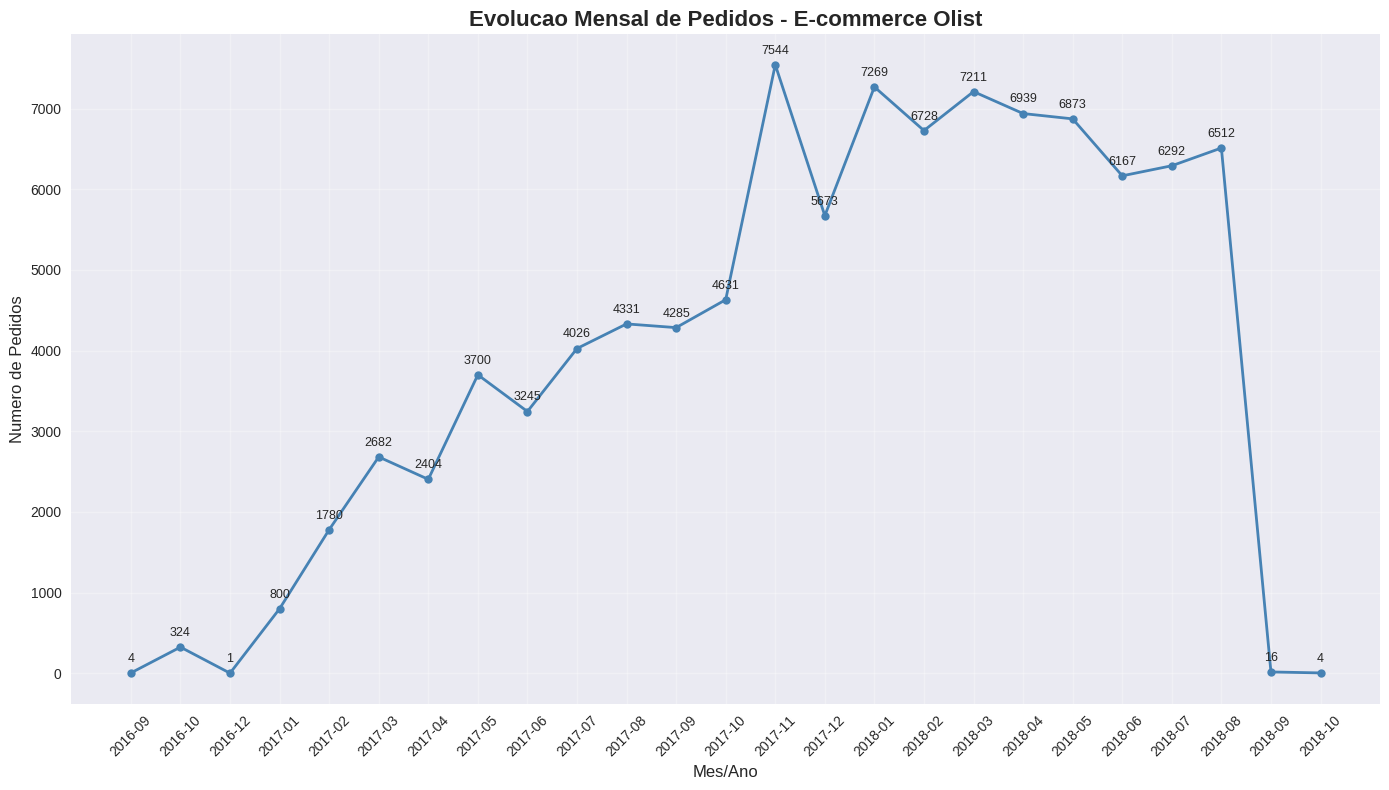

Periodo analisado: 2016-09 a 2018-10
Crescimento total: 0%
Mes com maior volume: 2017-11 (7544 pedidos)


In [4]:
# VISUALIZACAO 2: Evolucao temporal de pedidos
print("VISUALIZACAO 2 - EVOLUCAO TEMPORAL DE PEDIDOS")

# Converter datas
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['mes_ano'] = orders['order_purchase_timestamp'].dt.to_period('M')

# Contar pedidos por mes
pedidos_por_mes = orders.groupby('mes_ano').size()

# Criar grafico de linha
plt.figure(figsize=(14, 8))
plt.plot(pedidos_por_mes.index.astype(str), pedidos_por_mes.values,
         marker='o', linewidth=2, markersize=6, color='steelblue')

plt.title('Evolucao Mensal de Pedidos - E-commerce Olist', fontsize=16, fontweight='bold')
plt.xlabel('Mes/Ano', fontsize=12)
plt.ylabel('Numero de Pedidos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Adicionar valores nos pontos
for i, v in enumerate(pedidos_por_mes.values):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Estatisticas da evolucao
crescimento = ((pedidos_por_mes.iloc[-1] - pedidos_por_mes.iloc[0]) / pedidos_por_mes.iloc[0] * 100)
print(f"Periodo analisado: {pedidos_por_mes.index[0]} a {pedidos_por_mes.index[-1]}")
print(f"Crescimento total: {crescimento:.0f}%")
print(f"Mes com maior volume: {pedidos_por_mes.idxmax()} ({pedidos_por_mes.max()} pedidos)")

VISUALIZACAO 3 - DISTRIBUICAO DE PRECOS


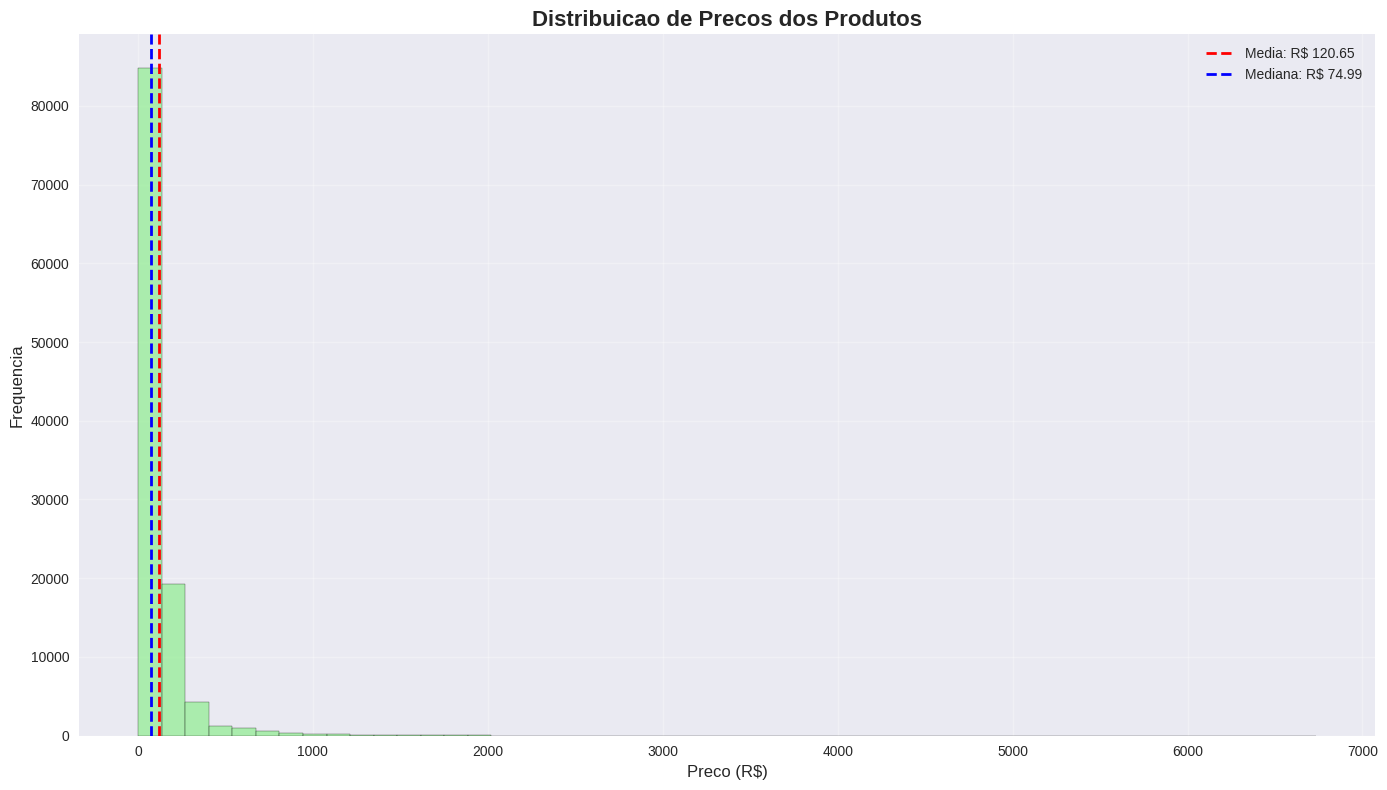

Preco medio: R$ 120.65
Preco mediano: R$ 74.99
Preco maximo: R$ 6735.00
Preco minimo: R$ 0.85


In [5]:
# VISUALIZACAO 3: Distribuicao de precos
print("VISUALIZACAO 3 - DISTRIBUICAO DE PRECOS")

# Criar histograma
plt.figure(figsize=(14, 8))
plt.hist(order_items['price'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)

plt.title('Distribuicao de Precos dos Produtos', fontsize=16, fontweight='bold')
plt.xlabel('Preco (R$)', fontsize=12)
plt.ylabel('Frequencia', fontsize=12)
plt.grid(True, alpha=0.3)

# Adicionar linhas de media e mediana
media_preco = order_items['price'].mean()
mediana_preco = order_items['price'].median()

plt.axvline(media_preco, color='red', linestyle='--', linewidth=2, label=f'Media: R$ {media_preco:.2f}')
plt.axvline(mediana_preco, color='blue', linestyle='--', linewidth=2, label=f'Mediana: R$ {mediana_preco:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"Preco medio: R$ {media_preco:.2f}")
print(f"Preco mediano: R$ {mediana_preco:.2f}")
print(f"Preco maximo: R$ {order_items['price'].max():.2f}")
print(f"Preco minimo: R$ {order_items['price'].min():.2f}")

VISUALIZACAO 4 - STATUS DOS PEDIDOS


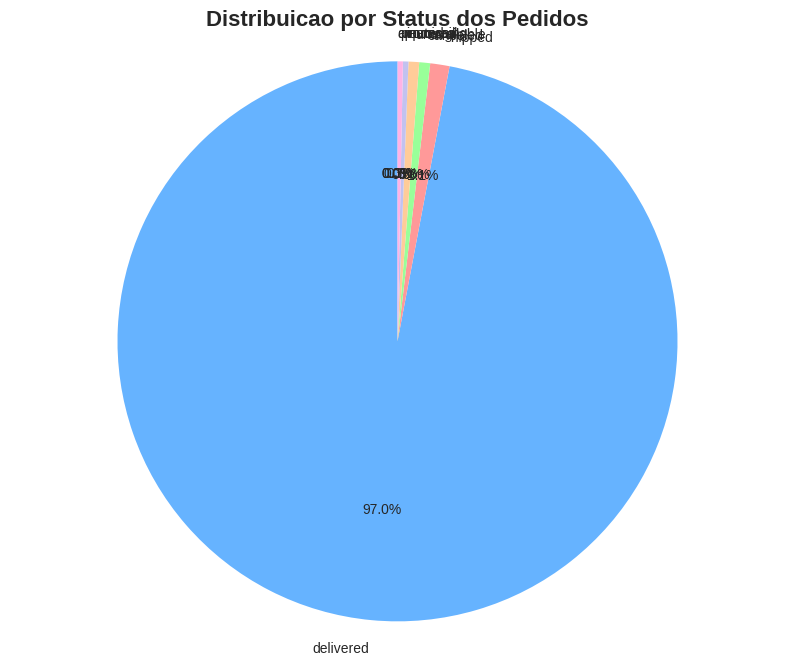

Distribuicao detalhada:
delivered: 96478 pedidos (97.0%)
shipped: 1107 pedidos (1.1%)
canceled: 625 pedidos (0.6%)
unavailable: 609 pedidos (0.6%)
invoiced: 314 pedidos (0.3%)
processing: 301 pedidos (0.3%)
created: 5 pedidos (0.0%)
approved: 2 pedidos (0.0%)


In [6]:
# VISUALIZACAO 4: Status dos pedidos
print("VISUALIZACAO 4 - STATUS DOS PEDIDOS")

# Preparar dados
status_pedidos = orders['order_status'].value_counts()

# Criar grafico de pizza
plt.figure(figsize=(10, 8))
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']
plt.pie(status_pedidos.values, labels=status_pedidos.index, autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('Distribuicao por Status dos Pedidos', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

print("Distribuicao detalhada:")
for status, count in status_pedidos.items():
    percentual = (count / len(orders)) * 100
    print(f"{status}: {count} pedidos ({percentual:.1f}%)")

VISUALIZACAO 5 - RELACAO PRECO VS FRETE


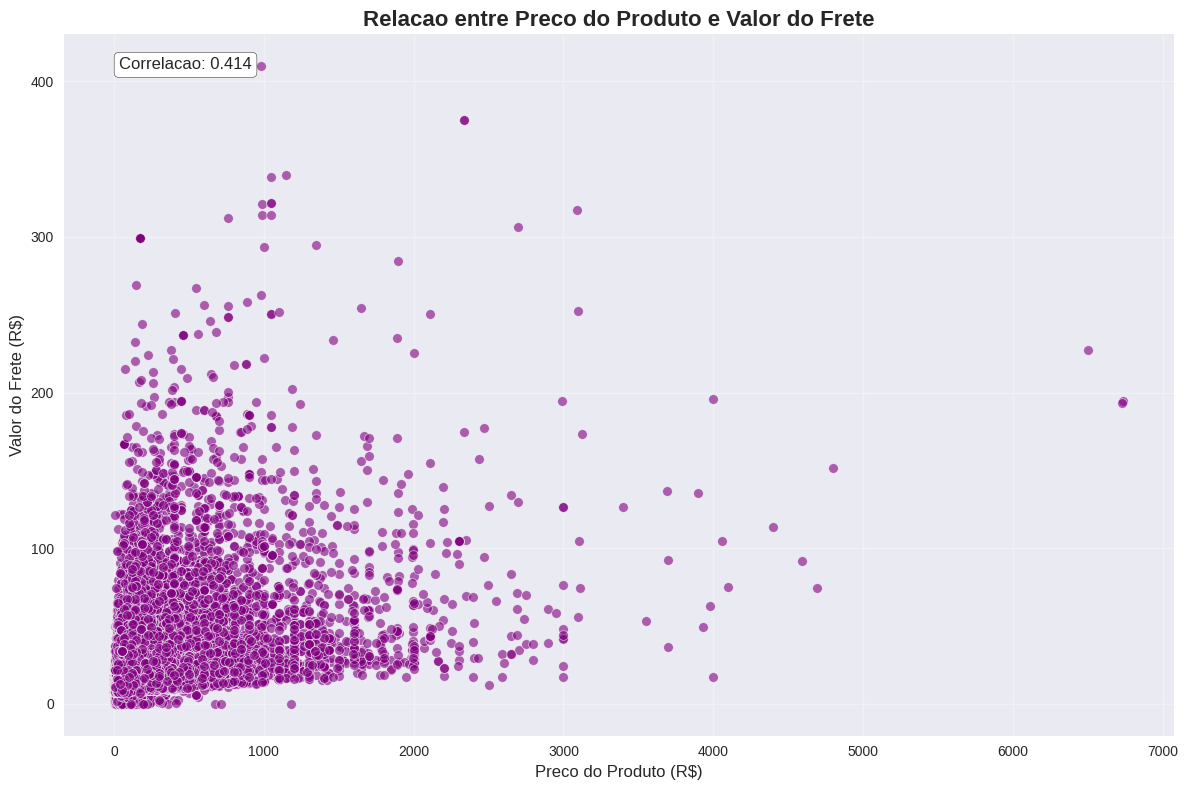

Correlacao entre preco e frete: 0.414


In [7]:
# VISUALIZACAO 5: Relacao preco vs frete
print("VISUALIZACAO 5 - RELACAO PRECO VS FRETE")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=order_items, x='price', y='freight_value', alpha=0.6, color='purple')
plt.title('Relacao entre Preco do Produto e Valor do Frete', fontsize=16, fontweight='bold')
plt.xlabel('Preco do Produto (R$)', fontsize=12)
plt.ylabel('Valor do Frete (R$)', fontsize=12)
plt.grid(True, alpha=0.3)

# Calcular correlacao
correlacao = order_items['price'].corr(order_items['freight_value'])
plt.text(0.05, 0.95, f'Correlacao: {correlacao:.3f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(boxstyle="round,pad=0.3", facecolor="white"))

plt.tight_layout()
plt.show()

print(f"Correlacao entre preco e frete: {correlacao:.3f}")

VISUALIZACAO 6 - TOP 10 PRODUTOS MAIS VENDIDOS


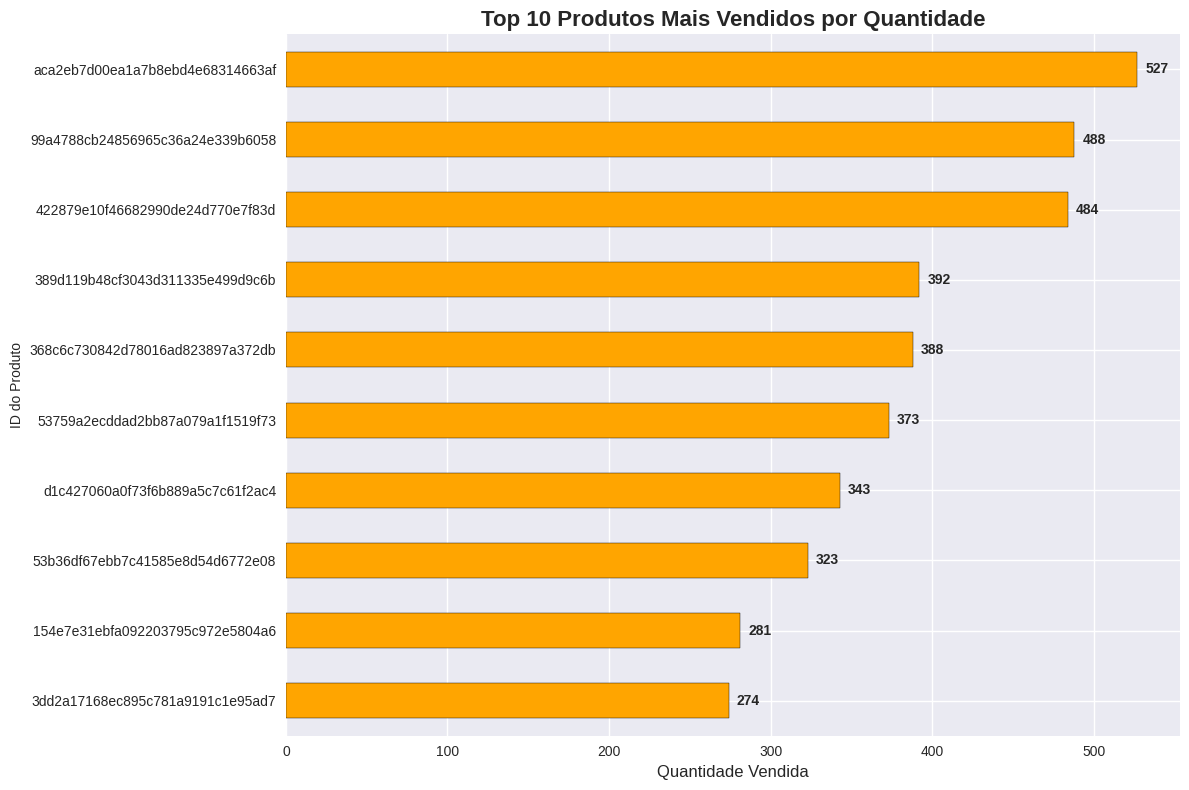

Top 5 produtos mais vendidos:
1. aca2eb7d00ea1a7b8ebd4e68314663af: 527 unidades
2. 99a4788cb24856965c36a24e339b6058: 488 unidades
3. 422879e10f46682990de24d770e7f83d: 484 unidades
4. 389d119b48cf3043d311335e499d9c6b: 392 unidades
5. 368c6c730842d78016ad823897a372db: 388 unidades


In [8]:
# VISUALIZACAO 6: Top 10 produtos mais vendidos
print("VISUALIZACAO 6 - TOP 10 PRODUTOS MAIS VENDIDOS")

top_produtos = order_items['product_id'].value_counts().head(10)

plt.figure(figsize=(12, 8))
bars = top_produtos.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 10 Produtos Mais Vendidos por Quantidade', fontsize=16, fontweight='bold')
plt.xlabel('Quantidade Vendida', fontsize=12)
plt.ylabel('ID do Produto', fontsize=10)
plt.gca().invert_yaxis()

# Adicionar valores nas barras
for i, v in enumerate(top_produtos.values):
    plt.text(v + 5, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Top 5 produtos mais vendidos:")
for i, (produto_id, quantidade) in enumerate(top_produtos.head().items(), 1):
    print(f"{i}. {produto_id}: {quantidade} unidades")

In [9]:
# RESUMO DO PROJETO 02
print("=== RESUMO DO PROJETO 02 - VISUALIZACOES ===")

print("VISUALIZACOES CRIADAS:")
print("1. Distribuicao geografica de clientes")
print("2. Evolucao temporal de pedidos")
print("3. Distribuicao de precos dos produtos")
print("4. Status dos pedidos (grafico de pizza)")
print("5. Relacao preco vs frete (scatter plot)")
print("6. Top 10 produtos mais vendidos")

print("\nPRINCIPAIS INSIGHTS VISUAIS:")
print(f"- SP concentra 42% dos clientes")
print(f"- 97% dos pedidos sao entregues com sucesso")
print(f"- Preco medio: R$ 120.65 (mediana: R$ 74.99)")
print(f"- Mes de pico: Nov/2017 com 7,544 pedidos")
print(f"- Produto mais vendido: {top_produtos.index[0]} com {top_produtos.iloc[0]} unidades")
print(f"- Correlacao preco-frete: 0.414 (moderada positiva)")

print("\nTECNICAS DE VISUALIZACAO UTILIZADAS:")
print("- Graficos de barras")
print("- Graficos de linha temporal")
print("- Histogramas")
print("- Graficos de pizza")
print("- Scatter plots")
print("- Graficos horizontais")

=== RESUMO DO PROJETO 02 - VISUALIZACOES ===
VISUALIZACOES CRIADAS:
1. Distribuicao geografica de clientes
2. Evolucao temporal de pedidos
3. Distribuicao de precos dos produtos
4. Status dos pedidos (grafico de pizza)
5. Relacao preco vs frete (scatter plot)
6. Top 10 produtos mais vendidos

PRINCIPAIS INSIGHTS VISUAIS:
- SP concentra 42% dos clientes
- 97% dos pedidos sao entregues com sucesso
- Preco medio: R$ 120.65 (mediana: R$ 74.99)
- Mes de pico: Nov/2017 com 7,544 pedidos
- Produto mais vendido: aca2eb7d00ea1a7b8ebd4e68314663af com 527 unidades
- Correlacao preco-frete: 0.414 (moderada positiva)

TECNICAS DE VISUALIZACAO UTILIZADAS:
- Graficos de barras
- Graficos de linha temporal
- Histogramas
- Graficos de pizza
- Scatter plots
- Graficos horizontais
